In [1]:
import re
import pdfplumber
import requests 
import time
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function

import datetime
import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

In [2]:
with pdfplumber.open("zeena.pdf") as pdf:   #open the schedule pdf and extract its text
    page = pdf.pages[0]
    text = page.extract_text()

In [3]:
tet = text.split("\n")
prog = re.compile(r'[A-Z]{2,5} [0-9]{3}')      #parameters for the course title
dayprog = re.compile(r'\bSUN|MON|TUE|WED|THU')  #parameters for the days
cls = prog.findall(text)

courses = [["", "","",""],["", "","",""],["", "","",""],["", "","",""],["", "","",""],["", "","",""]];    #empty matrix for keeping the information gathered(title and day)

i = -1;
x= 0;

for line in tet:    #reads the text line by line
    if prog.findall(line):
        coursename = prog.findall(line); #takes the title first at the begingning of every array
        x=0;
        i= i+1;
        courses[i][0] = coursename
        
    if dayprog.findall(line):   #takes the day and puts it after the title so that they stay relative
        x= x+1;
        courses[i][x] = (dayprog.findall(line))
        
print(courses)

[[['ENG 350'], ['TUE'], ['THU'], ['SUN']], [['JRL 301'], ['MON'], ['WED'], ''], [['LIT 302'], ['MON'], ['WED'], ''], [['LIT 401'], ['TUE'], ['THU'], ['SUN']], [['MGT 201'], ['TUE'], ['THU'], ['SUN']], ['', '', '', '']]


In [4]:
hour = [];
prog = re.compile(r'[0-9]{1,2}[:][0-9]{2}[a-z]{2}.')     #extracts the hours when the class starts and ends (in the correct order)
for line in text.split():
    if prog.match(line):
        hour.append(line);

print(hour)

loc = []; 
locprog = re.compile(r'\b[A-B]-')
for line in text.split():
    if locprog.match(line):
        loc.append(line);


print(loc)

['11:45am-12:45pm', '11:45am-12:45pm', '11:45am-12:45pm', '4:00pm-5:30pm', '4:00pm-5:30pm', '9:45am-11:15am', '9:45am-11:15am', '10:30am-11:30am', '10:30am-11:30am', '10:30am-11:30am', '2:15pm-3:15pm', '2:15pm-3:15pm', '2:15pm-3:15pm']
['B-F1-03', 'B-F1-03', 'B-F1-03', 'B-F1-03', 'B-F1-03', 'B-F1-03', 'B-F1-03', 'B-F1-03', 'B-F1-03', 'B-F1-03', 'A-B1-42', 'A-B1-42', 'A-B1-42']


In [5]:
b=hour;
entry =[re.split("-", entry, 9) for entry in b]  #removes the dash from the hours and seprates them

shourz = [];
ehourz = [];

sount =0;
newhour = [];
start= [];
end= [];
count = 0;

for string in entry:   
    for lime in string:
        def convert(time_string):
            date_var = time.strptime(time_string, '%I:%M%p')      #turns the hours to 24 hours and splits the minutes

            return date_var

        my_time = convert(lime)
        
        
        if my_time.tm_min == 15:                      #changes the minutes to deciml points for the graph
            newhour.append(my_time.tm_hour + .25);
            
        if my_time.tm_min == 30:
            newhour.append(my_time.tm_hour + .5);
            
        if my_time.tm_min == 45:
            newhour.append(my_time.tm_hour + .75);
            
        if my_time.tm_min == 0:
            newhour.append(my_time.tm_hour); 
            
        
        if sount == 0:                              #puts the odd in start and the even to the end
            start.append(newhour[count]); 
            shourz.append(str(my_time.tm_hour)+":"+str(my_time.tm_min))
            sount = 1; 
        else:
            end.append(newhour[count]); 
            ehourz.append(str(my_time.tm_hour)+":"+str(my_time.tm_min))
            sount = 0; 
        
        
        count+=1;

last = []; 
for i, j in zip(end,start):
 
    last.append(i - j)                          #finds out how long each class lasts for
print(shourz)
print(ehourz)
print(newhour)
print(start)
print(end)

['11:45', '11:45', '11:45', '16:0', '16:0', '9:45', '9:45', '10:30', '10:30', '10:30', '14:15', '14:15', '14:15']
['12:45', '12:45', '12:45', '17:30', '17:30', '11:15', '11:15', '11:30', '11:30', '11:30', '15:15', '15:15', '15:15']
[11.75, 12.75, 11.75, 12.75, 11.75, 12.75, 16, 17.5, 16, 17.5, 9.75, 11.25, 9.75, 11.25, 10.5, 11.5, 10.5, 11.5, 10.5, 11.5, 14.25, 15.25, 14.25, 15.25, 14.25, 15.25]
[11.75, 11.75, 11.75, 16, 16, 9.75, 9.75, 10.5, 10.5, 10.5, 14.25, 14.25, 14.25]
[12.75, 12.75, 12.75, 17.5, 17.5, 11.25, 11.25, 11.5, 11.5, 11.5, 15.25, 15.25, 15.25]


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=589120295956-kelhjed1ma7vlt8bopnosjr1i7skdkkv.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A49280%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcalendar&state=mdBdnGD94hgNfJKcMvr2HIHlyAqBdP&access_type=offline
Event created: https://www.google.com/calendar/event?eid=MThlbGFtcDNwdTM5cHZqNzU1Y2hyaXA2aThfMjAyMjA5MDZUMDg0NTAwWiB6bTE4MTkwQGF1aXMuZWR1LmtyZA
Event created: https://www.google.com/calendar/event?eid=cmNjY2Q1bjMwZnZkbmd1dWU2OWRhdm1kbmtfMjAyMjA5MDhUMDg0NTAwWiB6bTE4MTkwQGF1aXMuZWR1LmtyZA
Event created: https://www.google.com/calendar/event?eid=MXNhaWNsdjlyMDA2azFlcm5ycGNqYmtrZWNfMjAyMjA5MDRUMDg0NTAwWiB6bTE4MTkwQGF1aXMuZWR1LmtyZA
Event created: https://www.google.com/calendar/event?eid=aDhsNjRoZWxsMnA2NjAwcGJzbGwzNTU1OXNfMjAyMjA5MDVUMTMwMDAwWiB6bTE4MTkwQGF1aXMuZWR1LmtyZA
Event created: https://www.google.com/calendar/event?eid=NnBtcnY2Y

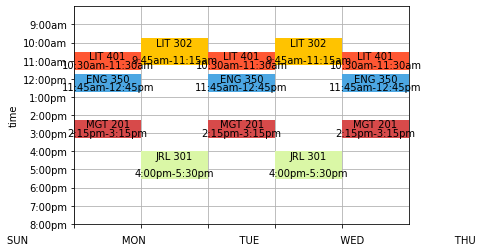

In [6]:

SCOPES = ['https://www.googleapis.com/auth/calendar']

def main(i, x, date):
            creds = None
            if os.path.exists('token.json'):                                        #Checks for google account sign in for calander events
                creds = Credentials.from_authorized_user_file('token.json', SCOPES)
        
            if not creds or not creds.valid:
                if creds and creds.expired and creds.refresh_token:
                    creds.refresh(Request())
                else:
                    flow = InstalledAppFlow.from_client_secrets_file(
                        'credintials.json', SCOPES)
                    creds = flow.run_local_server(port=0)
                with open('token.json', 'w') as token:
                    token.write(creds.to_json())

            try:
                service = build('calendar', 'v3', credentials=creds)
                event = {
                    'summary': cls[i],                                         #sets up a calander event based on the class name, location and time
                    'location': loc[x],
                    'start': {
                        'dateTime': date+'T'+shourz[x]+':00',
                        'timeZone': 'Etc/GMT-3',
                    },
                    'end': {
                        'dateTime': date+'T'+ehourz[x]+':00',
                        'timeZone': 'Etc/GMT-3',
                    },
                    'recurrence': [
                        'RRULE:FREQ=WEEKLY;COUNT=14'                    #repeats the instance of every class for 14 weeks
                    ],
                    'reminders': {
                        'useDefault': False,
                        'overrides': [
                        {'method': 'popup', 'minutes': 15},
                        ],
                    },
                    }

                event = service.events().insert(calendarId='primary', body=event).execute()              

            except HttpError as error:
                print('An error occurred: %s' % error)


fig, gnt = plt.subplots()

# Setting X-axis limits
gnt.set_xlim(0, 5)
gnt.set_ylim(8, 20)

# Setting labels for x-axis and y-axis 
gnt.set_xlabel('SUN                              MON                              TUE                          WED                             THU')
gnt.set_ylabel('time')

ax = plt.gca()
ax.invert_yaxis()

# Setting ticks on y-axis
gnt.set_yticks([9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# Labelling tickes of y-axis
gnt.set_yticklabels(['9:00am', '10:00am', '11:00am','12:00pm','1:00pm','2:00pm','3:00pm','4:00pm','5:00pm','6:00pm','7:00pm', '8:00pm'])

gnt.set_xticks([0, 1, 2, 3, 4])
gnt.set_xticklabels([])

# Setting graph attribute and colours 
gnt.grid(True)
colour= ['#4CA7E3', '#DAF7A6', '#FFC300', '#FF5733', '#D74A4A', 'tab:blue']

# Declaring a bar in schedule
i=0;
x=0;
date = "";
while(i<6):         #inputs the courses as broken bars 
    col = colour[i];
    for day in courses[i]:
        if day == ["SUN"]:              # checks days to graphs them
            gnt.broken_barh([(0, 1)], (start[x], last[x]), facecolors =col)
            plt.text(0.5, start[x], cls[i], ha="center", va="top")      #course title
            plt.text(0.5, end[x], hour[x], ha="center", va="bottom")    #course timing
            date = "2022-09-04";
            main(i,x, date)                                 #adds that class to the google Calander with a reminder 15mins before it starts
            x=x+1;
        if day == ["MON"]:
            gnt.broken_barh([(1, 1)], (start[x], last[x]), facecolors =col)
            plt.text(1.5, start[x], cls[i], ha="center", va="top")
            plt.text(1.5, end[x], hour[x], ha="center", va="bottom")
            date = "2022-09-05";
            main(i,x, date)
            x=x+1;
        if day == ["TUE"]:
            gnt.broken_barh([(2, 1)], (start[x], last[x]), facecolors =col)
            plt.text(2.5, start[x], cls[i], ha="center", va="top")
            plt.text(2.5, end[x], hour[x], ha="center", va="bottom")
            date = "2022-09-06";
            main(i,x, date)
            x=x+1;
        if day == ["WED"]:
            gnt.broken_barh([(3, 1)], (start[x], last[x]), facecolors =col)
            plt.text(3.5, start[x], cls[i], ha="center", va="top")
            plt.text(3.5, end[x], hour[x], ha="center", va="bottom")
            date = "2022-09-07";
            main(i,x,date)
            x=x+1;
        if day == ["THU"]:
            gnt.broken_barh([(4, 1)], (start[x], last[x]), facecolors =col)
            plt.text(4.5, start[x], cls[i], ha="center", va="top")
            plt.text(4.5, end[x], hour[x], ha="center", va="bottom")
            date = "2022-09-08";
            main(i,x,date)
            x=x+1;
    i=i+1;

   
gnt.set_axisbelow(True)
plt.rcParams["figure.figsize"] = (10,7)  #resizes the graph
plt.savefig("schdule.png")
